In [1]:
import numpy as np
import pandas as pd

In [200]:
import os
os.chdir("C:/Users/Kim Yuum/Desktop/투빅스/3주차/house-prices-advanced-regression-techniques")

In [151]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore') 

# 1. Data Preprocessing

In [201]:
data = pd.read_csv("./train.csv")
testdata = pd.read_csv("./test.csv")

In [5]:
from copy import copy
data2 = copy(data)

In [6]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [199]:
data.shape

(1460, 76)

In [153]:
# NaN 값이 얼마나 있는지 column별로 확인하기
data.isnull().sum()

# 전체 data 개수 대비 NaN의 비율이 30% 이상일 경우 해당 column 삭제
na = data.isnull().sum() / len(data)
for i in range(len(na)):
    if na.values[i] >=0.3:
        del data[na.index[i]]
na

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
                   ...   
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
Fireplaces       0.000000
FireplaceQu      0.472603
GarageType  

In [9]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object


In [159]:
# 숫자형 column만 저장
data_num = data.select_dtypes(include=[np.number])
data_num = data_num.drop(["Id","SalePrice"],axis=1)
# 문자형 column만 저장 
data_object = data.select_dtypes(exclude=[np.number])

In [160]:
# 평균값으로 결측치 채우기
data_num.fillna(data_num.mean(), inplace=True)  #결측치가 존재하는 column은 2개뿐!

Data Scaling

In [161]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler

for c in data_num:
    data_num[c] = StandardScaler().fit_transform(data_num[c].values.reshape(-1,1)).round(4)
data_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.0734,-0.2294,-0.2071,0.6515,-0.5172,1.0510,0.8787,0.5114,0.5754,-0.2887,...,0.3510,-0.7522,0.2165,-0.3593,-0.1163,-0.2702,-0.0687,-0.0877,-1.5991,0.1388
1,-0.8726,0.4519,-0.0919,-0.0718,2.1796,0.1567,-0.4296,-0.5744,1.1720,-0.2887,...,-0.0607,1.6262,-0.7045,-0.3593,-0.1163,-0.2702,-0.0687,-0.0877,-0.4891,-0.6144
2,0.0734,-0.0931,0.0735,0.6515,-0.5172,0.9848,0.8302,0.3231,0.0929,-0.2887,...,0.6317,-0.7522,-0.0704,-0.3593,-0.1163,-0.2702,-0.0687,-0.0877,0.9909,0.1388
3,0.3099,-0.4565,-0.0969,0.6515,-0.5172,-1.8636,-0.7203,-0.5744,-0.4993,-0.2887,...,0.7908,-0.7522,-0.1760,4.0925,-0.1163,-0.2702,-0.0687,-0.0877,-1.5991,-1.3677
4,0.0734,0.6336,0.3751,1.3748,-0.5172,0.9516,0.7333,1.3646,0.4636,-0.2887,...,1.6985,0.7802,0.5638,-0.3593,-0.1163,-0.2702,-0.0687,-0.0877,2.1009,0.1388


One_hot Encoding

In [13]:
data_object.isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [14]:
data_object.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [162]:
#One_hot Encoding
data_object = pd.get_dummies(data_object)
data_object.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [163]:
#숫자와 문자로 나누었던 데이터 다시 병합 
df = pd.concat([data_num,data_object,data["SalePrice"]], axis=1)  
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0.0734,-0.2294,-0.2071,0.6515,-0.5172,1.0510,0.8787,0.5114,0.5754,-0.2887,...,0,0,1,0,0,0,0,1,0,208500
1,-0.8726,0.4519,-0.0919,-0.0718,2.1796,0.1567,-0.4296,-0.5744,1.1720,-0.2887,...,0,0,1,0,0,0,0,1,0,181500
2,0.0734,-0.0931,0.0735,0.6515,-0.5172,0.9848,0.8302,0.3231,0.0929,-0.2887,...,0,0,1,0,0,0,0,1,0,223500
3,0.3099,-0.4565,-0.0969,0.6515,-0.5172,-1.8636,-0.7203,-0.5744,-0.4993,-0.2887,...,0,0,1,1,0,0,0,0,0,140000
4,0.0734,0.6336,0.3751,1.3748,-0.5172,0.9516,0.7333,1.3646,0.4636,-0.2887,...,0,0,1,0,0,0,0,1,0,250000


# 2. Feature Selection

Feature와 Label 간 상관분석

In [164]:
#변수와 label 간 상관계수 확인 및 정렬
corr_matrix = df.corr()
corr = abs(corr_matrix["SalePrice"]).sort_values(ascending=False)

In [165]:
corr

SalePrice               1.000000
OverallQual             0.790977
GrLivArea               0.708625
GarageCars              0.640412
GarageArea              0.623431
TotalBsmtSF             0.613580
1stFlrSF                0.605851
ExterQual_TA            0.589044
FullBath                0.560664
BsmtQual_Ex             0.553105
TotRmsAbvGrd            0.533724
YearBuilt               0.522897
KitchenQual_TA          0.519298
YearRemodAdd            0.507100
KitchenQual_Ex          0.504094
Foundation_PConc        0.497734
MasVnrArea              0.475240
GarageYrBlt             0.470177
Fireplaces              0.466929
ExterQual_Gd            0.452466
BsmtQual_TA             0.452394
ExterQual_Ex            0.451164
BsmtFinType1_GLQ        0.434597
HeatingQC_Ex            0.434543
GarageFinish_Fin        0.419678
GarageFinish_Unf        0.410608
Neighborhood_NridgHt    0.402149
BsmtFinSF1              0.386421
MasVnrType_None         0.374468
SaleType_New            0.357509
          

In [166]:
#상관계수가 0.3 이하인 feature 삭제
low_corr = corr[corr <= 0.3].index
df = df.drop(list(low_corr),axis=1)
df.head()  #45개 feature로 줄어듬 

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Detchd,GarageFinish_Fin,GarageFinish_Unf,SaleType_New,SaleCondition_Partial,SalePrice
0,-0.2294,0.6515,1.0510,0.8787,0.5114,0.5754,-0.4593,-0.7934,1.1619,0.3703,...,0,1,0,1,0,0,0,0,0,208500
1,0.4519,-0.0718,0.1567,-0.4296,-0.5744,1.1720,0.4665,0.2571,-0.7952,-0.4825,...,0,0,1,1,0,0,0,0,0,181500
2,-0.0931,0.6515,0.9848,0.8302,0.3231,0.0929,-0.3134,-0.6278,1.1894,0.5150,...,0,1,0,1,0,0,0,0,0,223500
3,-0.4565,0.6515,-1.8636,-0.7203,-0.5744,-0.4993,-0.6873,-0.5217,0.9373,0.3837,...,0,1,0,0,1,0,1,0,0,140000
4,0.6336,1.3748,0.9516,0.7333,1.3646,0.4636,0.1997,-0.0456,1.6179,1.2993,...,0,1,0,1,0,0,0,0,0,250000


파생변수 생성

In [167]:
df.to_csv('C:/Users/Kim Yuum/Desktop/투빅스/3주차/forkmeans.csv', sep=',') #k-means과제2번을 위해 R에서 변수를 만들어올테야!

In [168]:
os.chdir("C:/Users/Kim Yuum/Desktop/투빅스/3주차/")
df2 = pd.read_csv("./newdf.csv")

In [169]:
df2.head()

,Unnamed: 0,X,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,X1stFlrSF,...,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Detchd,GarageFinish_Fin,GarageFinish_Unf,SaleType_New,SaleCondition_Partial,SalePrice,cluster
0,1,0,-0.2294,0.6515,1.0510,0.8787,0.5114,0.5754,-0.4593,-0.7934,...,1,0,1,0,0,0,0,0,208500,3
1,2,1,0.4519,-0.0718,0.1567,-0.4296,-0.5744,1.1720,0.4665,0.2571,...,0,1,1,0,0,0,0,0,181500,3
2,3,2,-0.0931,0.6515,0.9848,0.8302,0.3231,0.0929,-0.3134,-0.6278,...,1,0,1,0,0,0,0,0,223500,3
3,4,3,-0.4565,0.6515,-1.8636,-0.7203,-0.5744,-0.4993,-0.6873,-0.5217,...,1,0,0,1,0,1,0,0,140000,5
4,5,4,0.6336,1.3748,0.9516,0.7333,1.3646,0.4636,0.1997,-0.0456,...,1,0,1,0,0,0,0,0,250000,4


In [170]:
del df2["Unnamed: 0"] #ID지우기

In [171]:
del df2["X"]

In [172]:
df2.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,GrLivArea,...,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Detchd,GarageFinish_Fin,GarageFinish_Unf,SaleType_New,SaleCondition_Partial,SalePrice,cluster
0,-0.2294,0.6515,1.0510,0.8787,0.5114,0.5754,-0.4593,-0.7934,1.1619,0.3703,...,1,0,1,0,0,0,0,0,208500,3
1,0.4519,-0.0718,0.1567,-0.4296,-0.5744,1.1720,0.4665,0.2571,-0.7952,-0.4825,...,0,1,1,0,0,0,0,0,181500,3
2,-0.0931,0.6515,0.9848,0.8302,0.3231,0.0929,-0.3134,-0.6278,1.1894,0.5150,...,1,0,1,0,0,0,0,0,223500,3
3,-0.4565,0.6515,-1.8636,-0.7203,-0.5744,-0.4993,-0.6873,-0.5217,0.9373,0.3837,...,1,0,0,1,0,1,0,0,140000,5
4,0.6336,1.3748,0.9516,0.7333,1.3646,0.4636,0.1997,-0.0456,1.6179,1.2993,...,1,0,1,0,0,0,0,0,250000,4


In [173]:
df2.corr()["SalePrice"].abs().sort_values()  #새로 추가한 cluster 상관계수 :0.720984 매우 유의함!

cluster                  0.122170
Exterior1st_VinylSd      0.305009
Exterior2nd_VinylSd      0.306389
BsmtExposure_Gd          0.307298
HeatingQC_TA             0.312677
OpenPorchSF              0.315857
X2ndFlrSF                0.319331
KitchenQual_Gd           0.321641
WoodDeckSF               0.324414
Neighborhood_NoRidge     0.330424
MasVnrType_Stone         0.330476
LotFrontage              0.334904
GarageType_Attchd        0.335961
Foundation_CBlock        0.343263
SaleCondition_Partial    0.352060
GarageType_Detchd        0.354141
SaleType_New             0.357509
MasVnrType_None          0.374468
BsmtFinSF1               0.386421
Neighborhood_NridgHt     0.402149
GarageFinish_Unf         0.410608
GarageFinish_Fin         0.419678
HeatingQC_Ex             0.434543
BsmtFinType1_GLQ         0.434597
ExterQual_Ex             0.451164
BsmtQual_TA              0.452394
ExterQual_Gd             0.452466
Fireplaces               0.466929
GarageYrBlt              0.470177
MasVnrArea    

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

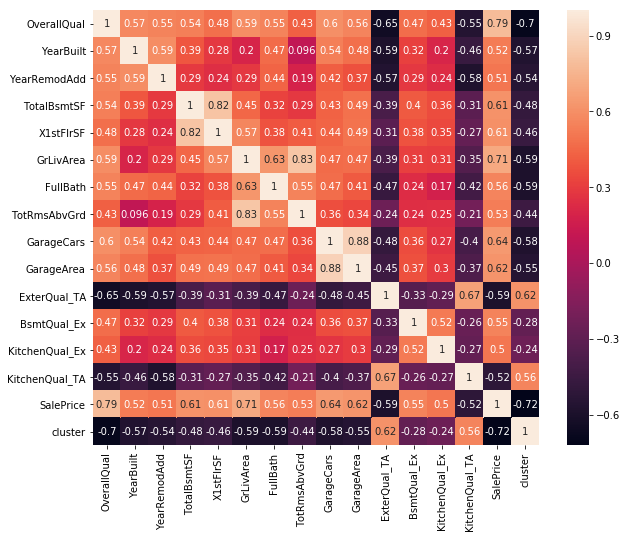

In [29]:
#히트맵으로 확인 
corr_matrix = df2.corr()
features = corr_matrix.index[corr_matrix["SalePrice"].abs() > 0.5]
plt.figure(figsize=(10,8))
sns.heatmap(df2[features].corr(), annot=True)

# 3. Modeling&Tuning

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

In [50]:
#RMSE function 만들기
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    rmse= np.sqrt(-cross_val_score(model, X.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [48]:
X = df2.drop("SalePrice",axis=1)
y = df2.SalePrice

In [49]:
X.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,GrLivArea,...,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Detchd,GarageFinish_Fin,GarageFinish_Unf,SaleType_New,SaleCondition_Partial,cluster
0,-0.2294,0.6515,1.0510,0.8787,0.5114,0.5754,-0.4593,-0.7934,1.1619,0.3703,...,0,1,0,1,0,0,0,0,0,2
1,0.4519,-0.0718,0.1567,-0.4296,-0.5744,1.1720,0.4665,0.2571,-0.7952,-0.4825,...,0,0,1,1,0,0,0,0,0,2
2,-0.0931,0.6515,0.9848,0.8302,0.3231,0.0929,-0.3134,-0.6278,1.1894,0.5150,...,0,1,0,1,0,0,0,0,0,2
3,-0.4565,0.6515,-1.8636,-0.7203,-0.5744,-0.4993,-0.6873,-0.5217,0.9373,0.3837,...,0,1,0,0,1,0,1,0,0,4
4,0.6336,1.3748,0.9516,0.7333,1.3646,0.4636,0.1997,-0.0456,1.6179,1.2993,...,0,1,0,1,0,0,0,0,0,1


In [54]:
model_LR = LinearRegression()
model_SVM = LinearSVC(C=1.0, random_state=1)
model_nb = GaussianNB()
model_KNN = KNeighborsClassifier(n_neighbors = 5)
model_DT = DecisionTreeClassifier(random_state=1)
model_rf = RandomForestClassifier(n_estimators=100, max_features=2, n_jobs=-1, oob_score=True)
model_Ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=500, 
                          learning_rate=0.1)
model_xgb = XGBClassifier(n_estimators=1000, max_depth=2, learning_rate=0.5, nthread=7)
model_LGBM = lgb.LGBMClassifier(num_leaves=2)

In [51]:
score_LR = rmsle_cv(model_LR)
score_SVM = rmsle_cv(model_SVM)
score_nb = rmsle_cv(model_nb)
print("LinearRegression score: {:.4f} ({:.4f})\n".format(score_LR.mean(), score_LR.std()))
print("SVM score: {:.4f} ({:.4f})\n".format(score_SVM.mean(), score_SVM.std()))
print("Naive Bayesian score: {:.4f} ({:.4f})\n".format(score_nb.mean(), score_nb.std()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

LinearRegression score: 33519.3204 (6687.4995)

SVM score: 48349.6138 (16801.2467)

Naive Bayesian score: 34066.0489 (23576.4514)



In [52]:
score_KNN = rmsle_cv(model_KNN)
score_DT = rmsle_cv(model_DT)
score_rf = rmsle_cv(model_rf)
print("KNN score: {:.4f} ({:.4f})\n".format(score_KNN.mean(), score_KNN.std()))
print("DT score: {:.4f} ({:.4f})\n".format(score_DT.mean(), score_DT.std()))
print("RandomForest score: {:.4f} ({:.4f})\n".format(score_rf.mean(), score_rf.std()))

KNN score: 38191.6821 (14903.5534)

DT score: 31062.2397 (16361.4319)

RandomForest score: 31660.7620 (12048.9255)



In [55]:
score_Ada = rmsle_cv(model_Ada)
print("Adaboost score: {:.4f} ({:.4f})\n".format(score_Ada.mean(), score_Ada.std()))

Adaboost score: 31068.3389 (23278.7567)



In [57]:
score_xgb = rmsle_cv(model_xgb)  ##PC에서 너무 오래 돌아간다,,,끝나지 않는다,,
print("Xgboost score: {:.4f} ({:.4f})\n".format(score_xgb.mean(), score_xgb.std()))

KeyboardInterrupt: 

In [56]:
score_LGBM = rmsle_cv(model_LGBM)
print("LightGBM score: {:.4f} ({:.4f})\n".format(score_LGBM.mean(), score_LGBM.std()))

LightGBM score: 30252.6613 (13945.3203)



# 4. Prediction

In [58]:
def rmsle(y, y_pred): 
    return np.sqrt(mean_squared_error(y, y_pred))

In [204]:
####test data 만들기####
# 숫자형 column만 저장
testdata_num = testdata.select_dtypes(include=[np.number])
testdata_num = testdata_num.drop(["Id"],axis=1)
# 문자형 column만 저장 
testdata_object = testdata.select_dtypes(exclude=[np.number])
# 평균값으로 결측치 채우기
testdata_num.fillna(testdata_num.mean(), inplace=True)  #결측치가 존재하는 column은 2개뿐!
#Standard Scaling
from sklearn.preprocessing import StandardScaler

for c in testdata_num:
    testdata_num[c] = StandardScaler().fit_transform(testdata_num[c].values.reshape(-1,1)).round(4)

#One_hot Encoding
testdata_object = pd.get_dummies(testdata_object)
#숫자와 문자로 나누었던 데이터 다시 병합 
test = pd.concat([testdata_num,testdata_object], axis=1) 

In [205]:
test.shape

(1459, 270)

In [174]:
df.columns

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd',
       'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Ex', 'ExterQual_Gd',
       'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Ex',
       'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtFinType1_GLQ', 'HeatingQC_Ex',
       'HeatingQC_TA', 'KitchenQual_Ex', 'KitchenQual_Gd', 'KitchenQual_TA',
       'GarageType_Attchd', 'GarageType_Detchd', 'GarageFinish_Fin',
       'GarageFinish_Unf', 'SaleType_New', 'SaleCondition_Partial',
       'SalePrice'],
      dtype='object')

In [207]:
df4 = df
df4.columns
del df4["SalePrice"]

In [208]:
test = test[df4.columns]  #train data와 같은 feature만 남김 

In [178]:
test.to_csv('C:/Users/Kim Yuum/Desktop/투빅스/3주차/test.csv', sep=',')

In [209]:
test.shape

(1459, 44)

In [211]:
os.chdir("C:/Users/Kim Yuum/Desktop/투빅스/3주차/")  #kmeans변수 추가
test2 = pd.read_csv("./newtest.csv")

In [212]:
test2.shape

(1459, 47)

In [213]:
test2.columns

Index(['Unnamed: 0', 'X', 'LotFrontage', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'X1stFlrSF',
       'X2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Exterior1st_VinylSd',
       'Exterior2nd_VinylSd', 'MasVnrType_None', 'MasVnrType_Stone',
       'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock',
       'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'HeatingQC_TA', 'KitchenQual_Ex',
       'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_Unf',
       'SaleType_New', 'SaleCondition_Partial', 'cluster'],
      dtype='object')

In [214]:
del test2["Unnamed: 0"]
del test2["X"]

In [215]:
test2.shape

(1459, 45)

In [216]:
model_DT.fit(X, y)  #RMSE가 낮았던 모델로 예측 
DT_train_pred = model_DT.predict(X)
DT_pred = model_DT.predict(test2)
print(rmsle(y, DT_train_pred))

620.704416451776


In [186]:
model_Ada.fit(X, y)
Ada_train_pred = model_Ada.predict(X)
Ada_pred = model_Ada.predict(test2)
print(rmsle(y, Ada_train_pred))

16836.186982801748


In [217]:
model_LGBM.fit(X, y)
LGBM_train_pred = model_LGBM.predict(X)
LGBM_pred = model_LGBM.predict(test2)
print(rmsle(y, LGBM_train_pred))

5553.152257952234


# Ensemble

In [218]:
ensemble = DT_pred*0.6 + LGBM_pred*0.4  #실제값과 오차가 적은 모델로 앙상블 

# Submission

In [219]:
sub = pd.DataFrame()
sub["Id"] = testdata["Id"]
sub["SalePrice"] = ensemble
sub.to_csv("./submission_yuum.csv",index = False)